In [1]:
import numpy as np
import pandas as pd

import os
import json
import requests
from bs4 import BeautifulSoup
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

### 1. Load Data

In [2]:
# Path to the base directory containing journal folders
base_dir = 'Database_Merge_Bluebook'

# Initialize the main dictionary to store all journals
journals_dict_merge = {}

# Function to extract the volume number from the filename
def extract_volume_number(filename):
    parts = filename.split('_')
    for i, part in enumerate(parts):
        if part.startswith('vol'):
            small_part = part.split('.')
            for j, other_part in enumerate(small_part):
                if other_part.startswith('vol'):
                    return small_part[j]
    return 'Unknown'

# Loop through each journal folder in the base directory
for journal_folder in os.listdir(base_dir):
    journal_path = os.path.join(base_dir, journal_folder)
    
    if os.path.isdir(journal_path):
        # Initialize a dictionary for the current journal
        volumes_dict = {}
        
        # Loop through each JSON file in the current journal folder
        for json_file in os.listdir(journal_path):
            json_file_path = os.path.join(journal_path, json_file)
            
            if json_file_path.endswith('.json'):
                with open(json_file_path, 'r') as file:
                    articles = json.load(file)
                    
                    # Get volume number from the JSON file name (assuming the volume number is part of the filename)
                    volume_number = extract_volume_number(json_file)
                    
                    articles_dict = articles
                    
                    # Add the current volume's articles dictionary to the volumes dictionary
                    volumes_dict[volume_number] = articles_dict
        
        # Add the current journal's volumes dictionary to the main dictionary
        journals_dict_merge[journal_folder] = volumes_dict

In [3]:
# Assuming your nested dictionary is named 'journals_dict_merge'
data = []

# Loop through each journal in the dictionary
for journal_name, volumes in journals_dict_merge.items():
    # Loop through each volume in the journal
    for volume, articles in volumes.items():
        # Loop through each article in the volume
        for article_name, article_data in articles.items():
            # Create a dictionary for each article with the relevant information
            article_info = {
                'journal_name': journal_name,
                'volume': volume,
                'article_name': article_name,
            }
            # Add the rest of the article data
            article_info.update(article_data)
            # Append the article information to the list
            data.append(article_info)

# Convert the list of dictionaries to a DataFrame
hein_df = pd.DataFrame(data)

In [4]:
hein_df.head()

,journal_name,volume,article_name,title,entry_type,authors,date,url,topics,citedby_articles,citedby_cases,citedby_ALI,accessed_by,text,starting_page,citation,gcs_uri,cites_bluebook
0,Harvard Journal of Law & Public Policy,24,Demystifying Antitrust State Action Doctrine,Demystifying Antitrust State Action Doctrine,Article,"[Semeraro, Steven]",2000-2001,https://heinonline.org/HOL/Page?handle=hein.jo...,"[Antitrust, Business and the Law, State Action...",28,0.0,0.0,9.0,DEMYSTIFYING ANTITRUST STATE\n ACTION DOCTRIN...,203,"Semeraro, Steven, Demystifying Antitrust State...",gs://claudius-scholar-user-files/ProcessedText...,"Steven Semeraro, Demystifying Antitrust State ..."
1,Harvard Journal of Law & Public Policy,24,Misunderstood Precedent: Andrew Jackson and th...,Misunderstood Precedent: Andrew Jackson and th...,Article,"[Ho, James C.]",2000-2001,https://heinonline.org/HOL/Page?handle=hein.jo...,"[Legal History, Constitutional Law, Generally,...",3,0.0,0.0,1.0,MISUNDERSTOOD PRECEDENT:\n ANDREW JACKSON AND...,283,"Ho, James C., Misunderstood Precedent: Andrew ...",gs://claudius-scholar-user-files/ProcessedText...,"James C. Ho, Misunderstood Precedent: Andrew J..."
2,Harvard Journal of Law & Public Policy,24,Everything I Need to Know About Presidents I L...,Everything I Need to Know About Presidents I L...,Article,"[Lawson, Gary]",2000-2001,https://heinonline.org/HOL/Page?handle=hein.jo...,"[Constitutional Law, Generally, Politics (Gene...",14,0.0,0.0,0.0,EVERYTHING I NEED TO KNOW ABOUT\n PRESIDENTS ...,381,"Lawson, Gary, Everything I Need to Know About ...",gs://claudius-scholar-user-files/ProcessedText...,"Gary Lawson, Everything I Need to Know About P..."
3,Harvard Journal of Law & Public Policy,24,White House Action on Civil Justice Reform: A ...,White House Action on Civil Justice Reform: A ...,Article,"[Schwartz, Victor E.]",2000-2001,https://heinonline.org/HOL/Page?handle=hein.jo...,"[Federalism, Political Theories and Ideologies...",6,0.0,1.0,0.0,WHITE HOUSE ACTION ON\n CIVIL JUSTICE REFORM:...,393,"Schwartz, Victor E., White House Action on Civ...",gs://claudius-scholar-user-files/ProcessedText...,"Victor E. Schwartz, White House Action on Civi..."
4,Harvard Journal of Law & Public Policy,24,Biological Terrorism: Legal Measures for Preve...,Biological Terrorism: Legal Measures for Preve...,Article,"[Kellman, Barry]",2000-2001,https://heinonline.org/HOL/Page?handle=hein.jo...,"[International Law, Terrorism, Crimes against ...",27,1.0,0.0,7.0,BIOLOGICAL TERRORISM:\n LEGAL MEASURES\n FOR ...,417,"Kellman, Barry, Biological Terrorism: Legal Me...",gs://claudius-scholar-user-files/ProcessedText...,"Barry Kellman, Biological Terrorism: Legal Mea..."


In [5]:
print("The shape of the orihinal data shape is", hein_df.shape)
print("The infornation of the data:", hein_df.info())
print("The features that the data has:", hein_df.columns)

The shape of the orihinal data shape is (49696, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49696 entries, 0 to 49695
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journal_name      49696 non-null  object 
 1   volume            49696 non-null  object 
 2   article_name      49696 non-null  object 
 3   title             49696 non-null  object 
 4   entry_type        49696 non-null  object 
 5   authors           49646 non-null  object 
 6   date              49696 non-null  object 
 7   url               49696 non-null  object 
 8   topics            47945 non-null  object 
 9   citedby_articles  49610 non-null  object 
 10  citedby_cases     48232 non-null  float64
 11  citedby_ALI       48220 non-null  float64
 12  accessed_by       48205 non-null  float64
 13  text              49696 non-null  object 
 14  starting_page     49696 non-null  object 
 15  citation          49696 non-null  o

### 2. Feature Engineering

In [6]:
df = hein_df.copy()
print('The shape of the orginal dataset is:', df.shape)

The shape of the orginal dataset is: (49696, 18)


In [7]:
# Extract the main author (first author) safely
df['main_author'] = df['authors'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

# Extract the main topic safely
df['main_topic'] = df['topics'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

# Calculate the number of authors
df['number_authors'] = df['authors'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate the feature 'citation per year'
df['date'] = df['date'].apply(lambda x: x.split('-')[-1] if isinstance(x, str) and '-' in x else x)
df['date'] = df['date'].replace('', None)
df['date'] = pd.to_numeric(df['date'], errors='coerce')
df.loc[df['date'] == 2, 'date'] = 2022 # The date of 'University_of_Illinois_Law_Review_vol2022.json' is wrong
df['year'] = 2024 - df['date']
df['citedby_articles'] = pd.to_numeric(df['citedby_articles'], errors='coerce')
df['citation_per_year'] = df['citedby_articles'] / df['year']

In [8]:
# List of journals to exclude if they have less than 50 articles
journals_to_exclude = [
    'Harvard Law Review Forum', 'Law and Contemporary Problems',
    'Ohio State Journal of Criminal Law', 'Washington and Lee Law Review Online',
    'Michigan Law Review Online', 'Chicago-Kent Law Review',
    'Journal of Criminal Law and Criminology', 'Southern California Law Review Postscript',
    'Georgetown Journal of Gender and the Law', 'Jurimetrics',
    'Virginia Law Review Online', 'Harvard Journal on Legislation',
    'Notre Dame Law Review Reflection', 'Duke Law & Technology Review',
    'Columbia Human Rights Law Review', 'Minnesota Law Review Headnotes',
    'American Journal of International Law', 'Georgetown Journal of Legal Ethics',
    'UC Davis Law Review Online'
]

# Filter out the specified journals and years 2000, 2023, and 2024
df = df[~((df['journal_name'].isin(journals_to_exclude)) & 
                   (df['journal_name'].map(df['journal_name'].value_counts()) < 50))]

# Exclude the year 2000, 2023, and 2024
df = df[~df['date'].isin([1998, 1999, 2000, 2023, 2024])]


df = df.dropna()
print('The shape of the dataset after cleaning:', df.shape)


# Display the resulting DataFrame
df.head()

The shape of the dataset after cleaning: (44285, 23)


,journal_name,volume,article_name,title,entry_type,authors,date,url,topics,citedby_articles,...,text,starting_page,citation,gcs_uri,cites_bluebook,main_author,main_topic,number_authors,year,citation_per_year
0,Harvard Journal of Law & Public Policy,24,Demystifying Antitrust State Action Doctrine,Demystifying Antitrust State Action Doctrine,Article,"[Semeraro, Steven]",2001.0,https://heinonline.org/HOL/Page?handle=hein.jo...,"[Antitrust, Business and the Law, State Action...",28.0,...,DEMYSTIFYING ANTITRUST STATE\n ACTION DOCTRIN...,203,"Semeraro, Steven, Demystifying Antitrust State...",gs://claudius-scholar-user-files/ProcessedText...,"Steven Semeraro, Demystifying Antitrust State ...","Semeraro, Steven",Antitrust,1,23.0,1.217391
1,Harvard Journal of Law & Public Policy,24,Misunderstood Precedent: Andrew Jackson and th...,Misunderstood Precedent: Andrew Jackson and th...,Article,"[Ho, James C.]",2001.0,https://heinonline.org/HOL/Page?handle=hein.jo...,"[Legal History, Constitutional Law, Generally,...",3.0,...,MISUNDERSTOOD PRECEDENT:\n ANDREW JACKSON AND...,283,"Ho, James C., Misunderstood Precedent: Andrew ...",gs://claudius-scholar-user-files/ProcessedText...,"James C. Ho, Misunderstood Precedent: Andrew J...","Ho, James C.",Legal History,1,23.0,0.130435
2,Harvard Journal of Law & Public Policy,24,Everything I Need to Know About Presidents I L...,Everything I Need to Know About Presidents I L...,Article,"[Lawson, Gary]",2001.0,https://heinonline.org/HOL/Page?handle=hein.jo...,"[Constitutional Law, Generally, Politics (Gene...",14.0,...,EVERYTHING I NEED TO KNOW ABOUT\n PRESIDENTS ...,381,"Lawson, Gary, Everything I Need to Know About ...",gs://claudius-scholar-user-files/ProcessedText...,"Gary Lawson, Everything I Need to Know About P...","Lawson, Gary","Constitutional Law, Generally",1,23.0,0.608696
3,Harvard Journal of Law & Public Policy,24,White House Action on Civil Justice Reform: A ...,White House Action on Civil Justice Reform: A ...,Article,"[Schwartz, Victor E.]",2001.0,https://heinonline.org/HOL/Page?handle=hein.jo...,"[Federalism, Political Theories and Ideologies...",6.0,...,WHITE HOUSE ACTION ON\n CIVIL JUSTICE REFORM:...,393,"Schwartz, Victor E., White House Action on Civ...",gs://claudius-scholar-user-files/ProcessedText...,"Victor E. Schwartz, White House Action on Civi...","Schwartz, Victor E.",Federalism,1,23.0,0.260870
4,Harvard Journal of Law & Public Policy,24,Biological Terrorism: Legal Measures for Preve...,Biological Terrorism: Legal Measures for Preve...,Article,"[Kellman, Barry]",2001.0,https://heinonline.org/HOL/Page?handle=hein.jo...,"[International Law, Terrorism, Crimes against ...",27.0,...,BIOLOGICAL TERRORISM:\n LEGAL MEASURES\n FOR ...,417,"Kellman, Barry, Biological Terrorism: Legal Me...",gs://claudius-scholar-user-files/ProcessedText...,"Barry Kellman, Biological Terrorism: Legal Mea...","Kellman, Barry",International Law,1,23.0,1.173913


In [9]:
df.columns

Index(['journal_name', 'volume', 'article_name', 'title', 'entry_type',
       'authors', 'date', 'url', 'topics', 'citedby_articles', 'citedby_cases',
       'citedby_ALI', 'accessed_by', 'text', 'starting_page', 'citation',
       'gcs_uri', 'cites_bluebook', 'main_author', 'main_topic',
       'number_authors', 'year', 'citation_per_year'],
      dtype='object')

In [10]:
Y = df['citation_per_year']
ftr_name = ['journal_name', 'year',
       'citedby_cases', 'citedby_ALI', 'accessed_by', 
       'number_authors']
X = df.loc[:,ftr_name]

### 3. EDA

In [11]:
X['journal_name'].value_counts()

journal_name
Iowa Law Review                                 486
American Criminal Law Review                    470
Minnesota Law Review                            460
William & Mary Law Review                       449
Michigan State Law Review                       448
                                               ... 
California Law Review Online                     65
Georgetown Law Journal Online                    59
CUNY Law Review                                  57
Stanford Technology Law Review                   55
University of Pennsylvania Law Review Online     54
Name: count, Length: 190, dtype: int64

In [12]:
X['year'].describe()

count    44285.000000
mean        11.696669
std          5.982610
min          2.000000
25%          7.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: year, dtype: float64

In [13]:
X['number_authors'].describe()

count    44285.000000
mean         1.261646
std          0.638031
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: number_authors, dtype: float64

In [14]:
Y.describe()

count    44285.000000
mean         1.745555
std          2.599320
min          0.000000
25%          0.375000
50%          1.000000
75%          2.071429
max         60.333333
Name: citation_per_year, dtype: float64

### 4. Data Splitting

In [15]:
random_state = 42

# first split to separate out the training set
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, random_state = random_state)
print('training set:',X_train.shape, y_train.shape) # 80% of points are in train
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

training set: (35428, 6) (35428,)
test set: (8857, 6) (8857,)


### 5. Data Preprocessing

In [16]:
# collect the various features
cat_ftrs = ['journal_name']
num_ftrs = ['citedby_cases', 'citedby_ALI', 'accessed_by', 'number_authors', 'year']

In [17]:
# preprocess with pipeline and columntransformer

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# minmax scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])


# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),])

In [18]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)


# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)

(35428, 195)
(8857, 195)


In [19]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (35428, 195)
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0


### 6. Model Deployment

#### (1) Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression # import the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

LinReg = LinearRegression() # initialize a simple linear regression model 
LinReg.fit(df_train,y_train) # we will learn now what happens when you issue this line in regression
y_predict = LinReg.predict(df_test)

In [30]:
test_MSE_LinReg = mean_squared_error(y_test, y_predict)
print(test_MSE_LinReg)

test_MAE_LinReg = mean_absolute_error(y_test, y_predict)
print(test_MAE_LinReg)

4.427345300331046
1.2208761434616422


In [33]:
y_test = y_test.round(0)
error = np.abs(y_test-y_predict)
error.describe()

count    8857.000000
mean        1.220876
std         1.713808
min         0.000073
25%         0.441183
50%         0.777974
75%         1.435934
max        43.614282
Name: citation_per_year, dtype: float64

In [34]:
y_test.describe()

count    8857.000000
mean        1.382635
std         2.630476
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: citation_per_year, dtype: float64

In [ ]:
y_predict.describe()

#### (2) Lasso Regression

In [78]:
from  sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-7,0,29)
ws = []
models = []
train_MSE_Lasso = np.zeros(len(alpha))
test_MSE_Lasso = np.zeros(len(alpha))

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Lasso(alpha=alpha[i],max_iter=100000000)
    lin_reg.fit(df_train, y_train)
    ws.append(lin_reg.coef_)
    models.append(lin_reg)
    train_MSE_Lasso[i] = mean_squared_error(y_train,lin_reg.predict(df_train))
    test_MSE_Lasso[i] = mean_squared_error(y_test,lin_reg.predict(df_test))

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(alpha, ws)
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('ws')
plt.title('Lasso regression')
plt.tight_layout()
# plt.savefig('figures/lasso_coefs.png',dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(alpha,train_MSE_Lasso,label='train score')
plt.plot(alpha,test_MSE_Lasso,label='test score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
# plt.savefig('figures/train_val_MSE_lasso.png',dpi=300)
plt.show()

In [ ]:
print(np.argmin(train_MSE_Lasso))
print(alpha[np.argmin(test_MSE_Lasso)])

#### (3) Ridge Regression

In [ ]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha = np.logspace(-10,0,51)

# arrays to save train and test MSE scores
train_MSE_Ridge = np.zeros(len(alpha))
test_MSE_Ridge = np.zeros(len(alpha))

ws = []

# do the fit
for i in range(len(alpha)):
    # load the linear regression model
    lin_reg = Ridge(alpha=alpha[i])
    lin_reg.fit(df_train, y_train)
    ws.append(lin_reg.coef_)
    # train and test scores
    train_MSE_Ridge[i] = mean_squared_error(y_train,lin_reg.predict(df_train))
    test_MSE_Ridge[i] = mean_squared_error(y_test,lin_reg.predict(df_test))

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(alpha, ws) 
plt.semilogx()
plt.ylim([-1e1,1e1])
plt.xlabel('alpha')
plt.ylabel('ws')
plt.title('Ridge regression')
plt.tight_layout()
plt.savefig('figures/ridge_coefs.png',dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(alpha,train_MSE_Ridge,label='train score')
plt.plot(alpha,test_MSE_Ridge,label='test score')
plt.semilogy()
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('MSE cost function')
plt.legend()
plt.tight_layout()
plt.savefig('figures/train_val_MSE_ridge.png',dpi=300)
plt.show()

____________________________________________________________________________________________________________________________________________________________________

In [75]:
from collections import Counter

# Flatten the list of lists and count each unique topic
all_topics = []

for sublist in df['topics'].values:
    if sublist is None:
        continue
    for topic in sublist:
        all_topics.append(topic)

topic_counts = Counter(all_topics)

# Convert the Counter object to a DataFrame for easier visualization (optional)
import pandas as pd
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Count'])

# Display the result
topic_counts_df.sort_values(by='Count', ascending=False, inplace=True)
topic_counts_df


,Topic,Count
9,"Constitutional Law, Generally",9933
93,Legal Practice and Procedure,8216
63,Criminal Law and Procedure,7030
108,Intellectual Property Law,6108
1,Business and the Law,5895
...,...,...
1423,Agent Orange,1
1425,Seat Belts,1
1426,Layoffs,1
1285,Hepatitis,1


In [76]:
topic_counts_df.describe()

,Count
count,1451.000000
mean,209.842867
std,675.009997
min,1.000000
25%,10.000000
50%,29.000000
75%,97.000000
max,9933.000000


In [77]:
topic_counts_df[topic_counts_df['Count'] >= 29].shape

(726, 2)

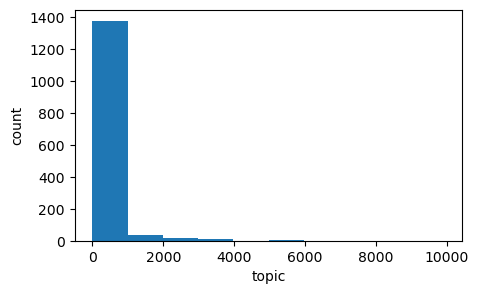

In [78]:
from matplotlib import pylab as plt
plt.figure(figsize=(5, 3))

topic_counts_df['Count'].plot.hist()
plt.xlabel('topic')
plt.ylabel('count')
plt.show()

In [79]:
df['topics'][0]

['Antitrust',
 'Business and the Law',
 'State Action',
 'State and Local Government Law',
 'Trade Regulation',
 'Federalism',
 'Political Theories and Ideologies',
 'Jurisdiction']

In [81]:
df.loc[df['topics'].isnull()]


,journal_name,volume,article_name,title,entry_type,authors,date,url,topics,citedby_articles,citedby_cases,citedby_ALI,accessed_by,text,starting_page,citation,gcs_uri,cites_bluebook
343,Journal of Technology Law & Policy,15,Defending Section 230: The Value of Intermedia...,Defending Section 230: The Value of Intermedia...,Article,"[Kosseff, Jeff]",2010,https://heinonline.org/HOL/Page?handle=hein.jo...,None,17,NaN,NaN,NaN,Journal of Technology Law & Policy\n Volume 1...,123,"Kosseff, Jeff, Defending Section 230: The Valu...",gs://claudius-scholar-user-files/ProcessedText...,"Jeff Kosseff, Defending Section 230: The Value..."
349,Journal of Technology Law & Policy,19,Show Me the Metadata: The Case to Standardize ...,Show Me the Metadata: The Case to Standardize ...,Article,"[Simmons-Elder, Cory]",2014,https://heinonline.org/HOL/Page?handle=hein.jo...,None,0,0.0,0.0,29.0,\n \n \n \n \n ARTI...,157,"Simmons-Elder, Cory, Show Me the Metadata: The...",gs://claudius-scholar-user-files/ProcessedText...,"Cory Simmons-Elder, Show Me the Metadata: The ..."
352,Journal of Technology Law & Policy,8,Just Turn North on State Street and then Follo...,Just Turn North on State Street and then Follo...,Article,"[Lemley, Kevin Michael]",2003,https://heinonline.org/HOL/Page?handle=hein.jo...,None,10,NaN,NaN,NaN,JUST TURN NORTH ON STATE STREET AND THEN FOLL...,1,"Lemley, Kevin Michael, Just Turn North on Stat...",gs://claudius-scholar-user-files/ProcessedText...,"Kevin Michael Lemley, Just Turn North on State..."
355,Journal of Technology Law & Policy,8,The Phenomenon of Insecure Software in a Secur...,The Phenomenon of Insecure Software in a Secur...,Article,"[Skibell, Reid]",2003,https://heinonline.org/HOL/Page?handle=hein.jo...,None,6,NaN,NaN,NaN,University of Florida\n Journal of Technology...,107,"Skibell, Reid, The Phenomenon of Insecure Soft...",gs://claudius-scholar-user-files/ProcessedText...,"Reid Skibell, The Phenomenon of Insecure Softw..."
357,Journal of Technology Law & Policy,23,Intellectual Contract and Intellectual Law,Intellectual Contract and Intellectual Law,Article,"[Spulber, Daniel F.]",2018-2019,https://heinonline.org/HOL/Page?handle=hein.jo...,None,2,0.0,0.0,14.0,\n \n \n \n \n \n \n INTELLECTUAL CONTRAC...,1,"Spulber, Daniel F., Intellectual Contract and ...",gs://claudius-scholar-user-files/ProcessedText...,"Daniel F. Spulber, Intellectual Contract and I..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49349,Fordham International Law Journal,43,Reforming the Approach to Political Opinion in...,Reforming the Approach to Political Opinion in...,Article,"[Bagaric, Brienna]",2019-2020,https://heinonline.org/HOL/Page?handle=hein.jo...,None,0,0.0,0.0,27.0,\n \n \n \n \n \n \n \n ARTICLE\n \n \n R...,503,"Bagaric, Brienna, Reforming the Approach to Po...",gs://claudius-scholar-user-files/ProcessedText...,"Brienna Bagaric, Reforming the Approach to Pol..."
49355,Fordham International Law Journal,43,Firearms Regulation in the European Union: Str...,Firearms Regulation in the European Union: Str...,Article,"[Kirst, Niels F.]",2019-2020,https://heinonline.org/HOL/Page?handle=hein.jo...,None,0,0.0,0.0,31.0,\n \n \n \n \n \n \n \n ...,855,"Kirst, Niels F., Firearms Regulation in the Eu...",gs://claudius-scholar-user-files/ProcessedText...,"Niels F. Kirst, Firearms Regulation in the Eur..."
49361,Fordham International Law Journal,38,Beyond Self-Judgment: Exceptions Clauses in US...,Beyond Self-Judgment: Exceptions Clauses in US...,Article,"[Gibson, Catherine H.]",2015,https://heinonline.org/HOL/Page?handle=hein.jo...,None,3,0.0,0.0,14.0,\n \n \n \n \n \n \n \n ...,1,"Gibson, Catherine H., Beyond Self-Judgment: Ex...",gs://claudius-scholar-user-files/ProcessedText...,"Catherine H. Gibson, Beyond Self-Judgment: Exc..."
49370,Fordham International Law Journal,38,Ending Female Genital Mutilation & Child Marri...,Ending Female Genital Mutilation & Child Marri...,Article,"[Avalos, Lisa, Farrell, Naima, Stellato, 

In [84]:
df.loc[df['topics'].isnull(), 'topics'] = 'Other'

In [85]:
df.loc[343, :]

journal_name                       Journal of Technology Law & Policy
volume                                                             15
article_name        Defending Section 230: The Value of Intermedia...
title               Defending Section 230: The Value of Intermedia...
entry_type                                                    Article
authors                                               [Kosseff, Jeff]
date                                                             2010
url                 https://heinonline.org/HOL/Page?handle=hein.jo...
topics                                                          Other
citedby_articles                                                   17
citedby_cases                                                     NaN
citedby_ALI                                                       NaN
accessed_by                                                       NaN
text                 Journal of Technology Law & Policy\n Volume 1...
starting_page       

In [86]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)
topics_sparse_matrix = mlb.fit_transform(df['topics'])

# 将稀疏矩阵转换为DataFrame（可选）
topics_df = pd.DataFrame.sparse.from_spmatrix(topics_sparse_matrix, columns=mlb.classes_)

In [89]:
topics_df

,AIDS,Abortion,Academic Freedom,Accident Insurance,Accomplices,Actions and Defenses,Administration of Justice,Administrative Acts,Administrative Agencies,Administrative Courts,...,Wrongful Birth/Life,Wrongful Death,Wrongful Discharge,YK,Youth Sports,Zoning,e,h,r,t
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 先将topics列表转化为字符串
df['topics_str'] = df['topics'].apply(lambda x: ', '.join(x))

tfidf = TfidfVectorizer()
topics_tfidf_matrix = tfidf.fit_transform(df['topics_str'])

# 将TF-IDF矩阵转换为DataFrame（可选）
topics_tfidf_df = pd.DataFrame.sparse.from_spmatrix(topics_tfidf_matrix, columns=tfidf.get_feature_names_out())

TypeError: can only join an iterable